APS 5 - CIÊNCIA DE DADOS

Henrique Scofield Sotto Mayor e Henrique Turco Gera

In [80]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('dados/brasileirao-2004-2022.csv')

In [82]:
df.head()

,season,place,team,points,played,won,draw,loss,goals_for,goals_against,goals_diff
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55
1,2003,2,Santos,87,46,25,12,9,93,60,33
2,2003,3,SaoPaulo,78,46,22,12,12,81,67,14
3,2003,4,SaoCaetano,74,46,19,14,13,53,37,16
4,2003,5,Coritiba,73,46,21,10,15,67,58,9


In [83]:
df.columns

Index(['season', 'place', 'team', 'points', 'played', 'won', 'draw', 'loss',
       'goals_for', 'goals_against', 'goals_diff'],
      dtype='object')

In [84]:
df_ = df[df['team'] == ' Cruzeiro']

In [85]:
media = df_['points'].mean()
print(media)

60.588235294117645


In [86]:
alfa = 0.05
desvio_padrao = df_['points'].std()

In [87]:
p1 = st.norm.ppf(0.025, loc = media, scale = desvio_padrao / ((len(df_) ** 0.5)))
p2 = st.norm.ppf(1-0.025, loc = media, scale = desvio_padrao / ((len(df_) ** 0.5)))
print(p1 , p2)


53.5153741854943 67.66109640274098


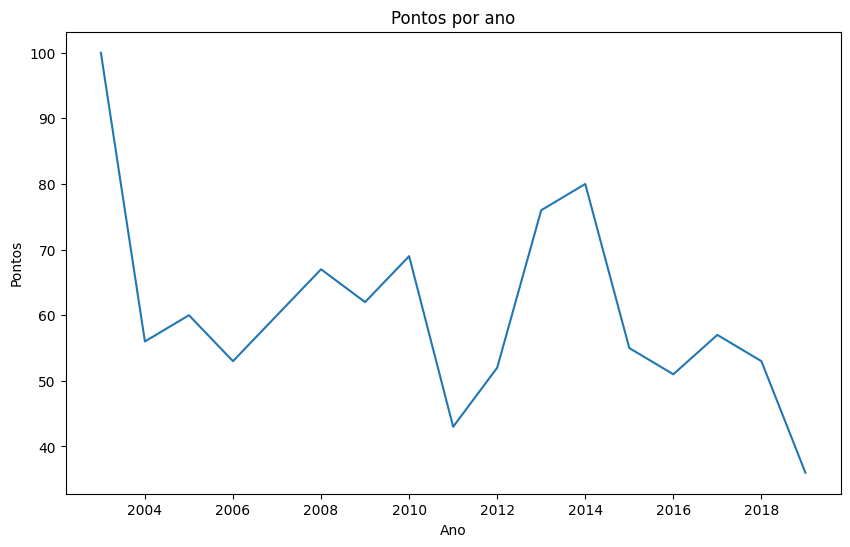

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(df_['season'], df_['points'])
plt.xlabel('Ano')
plt.ylabel('Pontos')
plt.title('Pontos por ano')
plt.show()

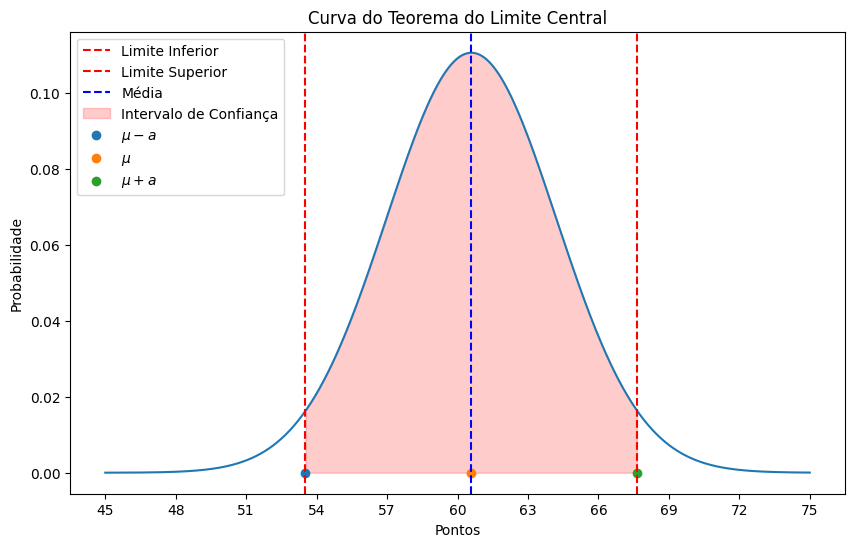

In [93]:
p1 = st.norm.ppf(0.025, loc=media, scale=desvio_padrao / ((len(df_) ** 0.5)))
p2 = st.norm.ppf(1 - 0.025, loc=media, scale=desvio_padrao / ((len(df_) ** 0.5)))

x = np.linspace(45, 75, 1000)
y = st.norm.pdf(x, loc=media, scale=desvio_padrao / ((len(df_) ** 0.5)))

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.xlabel('Pontos')
plt.ylabel('Probabilidade')
plt.title('Curva do Teorema do Limite Central')
plt.axvline(x=p1, color='red', linestyle='--', label='Limite Inferior')
plt.axvline(x=p2, color='red', linestyle='--', label='Limite Superior')
plt.axvline(x=media, color='blue', linestyle='--', label='Média')
plt.fill_between(x, 0, y, where=(x >= p1) & (x <= p2), color='red', alpha=0.2, label='Intervalo de Confiança')
plt.xticks(np.arange(45, 76, 3))

plt.scatter(p1, 0, label='$\mu-a$')
plt.scatter(media, 0, label='$\mu$')
plt.scatter(p2, 0, label='$\mu+a$')

plt.legend()
plt.show()